Allah

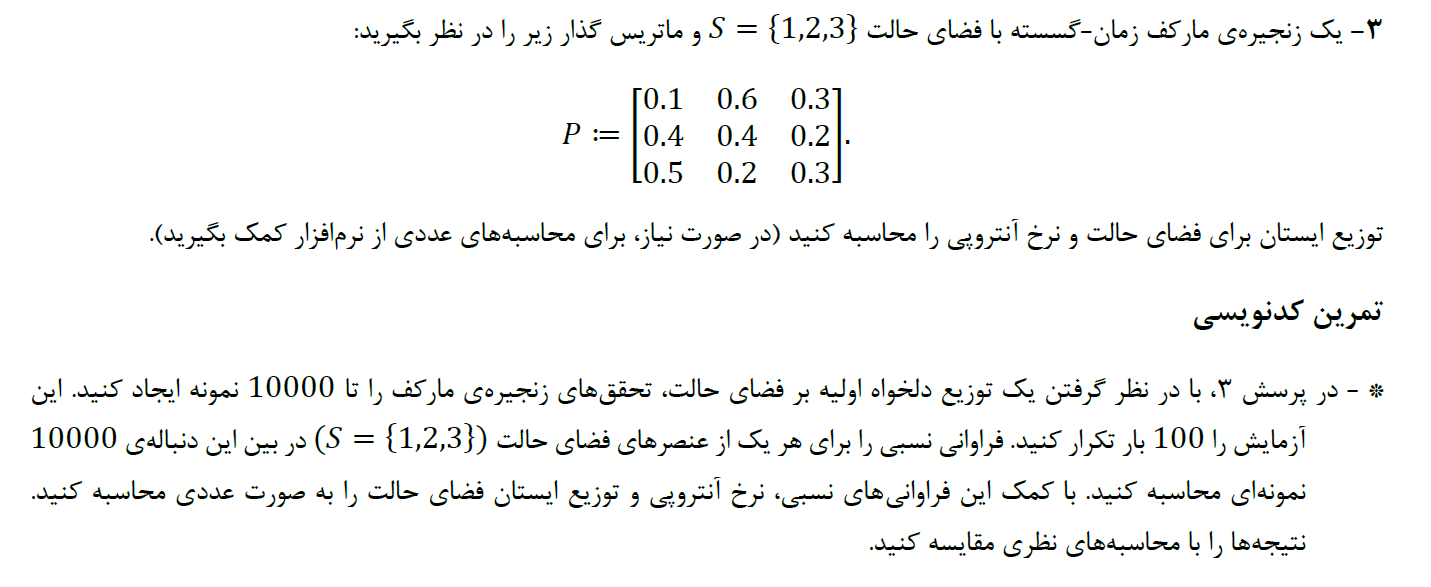

In [13]:
import numpy as np

# Transition matrix
P = np.array([
    [0.1, 0.6, 0.3],
    [0.4, 0.4, 0.2],
    [0.5, 0.2, 0.3]
], dtype=float)

# ---------------------------------------------------------
# 1(a) Compute stationary distribution
# ---------------------------------------------------------
# Solve pi P = pi  <=> (P^T - I) pi^T = 0 with sum(pi) = 1

A = P.T - np.eye(3)
A = np.vstack([A, np.ones(3)])   # Add constraint sum(pi)=1
b = np.array([0, 0, 0, 1], dtype=float)

mu = np.linalg.lstsq(A, b, rcond=None)[0]
print("Stationary distribution:", mu)

Stationary distribution: [0.32758621 0.4137931  0.25862069]


In [3]:
# ---------------------------------------------------------
# 1(b) Compute entropy rate
# ---------------------------------------------------------
def entropy_rate(pi, P):
    eps = 1e-15  # avoid log(0)
    H = 0.0
    for i in range(len(pi)):
        for j in range(len(pi)):
            if P[i, j] > 0:
                H += pi[i] * (-P[i, j] * np.log2(P[i, j] + eps))
    return H

H_exact = entropy_rate(pi, P)
print("Theoretical entropy rate (bits):", H_exact)

Theoretical entropy rate (bits): 1.4383134271764586


In [9]:
# ---------------------------------------------------------
# 2. Monte-Carlo simulation
# ---------------------------------------------------------
# Transition matrix
P = np.array([
    [0.1, 0.6, 0.3],
    [0.4, 0.4, 0.2],
    [0.5, 0.2, 0.3]
], dtype=float)

def simulate_chain(P, n_steps, start_state=0):
    states = np.zeros(n_steps, dtype=int)
    states[0] = start_state
    for t in range(1, n_steps):
        states[t] = np.random.choice(3, p=P[states[t-1]])
    return states

N = 10_000
N_iter = 500
trajectory_mat = np.zeros((N_iter, N))
for iteration in range(N_iter):
  trajectory = simulate_chain(P, N, start_state=0)
  trajectory_mat[iteration, :] = trajectory


In [14]:
S, counts = np.unique(trajectory_mat[:, -1], return_counts= True)
mu_emp = counts/ sum(counts)
print('mu_emp:', mu_emp)
print('mu_real', mu)

mu_emp: [0.328 0.434 0.238]
mu_real [0.32758621 0.4137931  0.25862069]


In [19]:
# empirical conditional probabilities
counts = np.zeros_like(P)
for i in range(len(P)):
    idx = np.where(trajectory[:-1] == i)[0]
    next_states = trajectory[idx + 1]
    for j in range(len(P)):
        counts[i, j] = np.sum(next_states == j)

row_sums = counts.sum(axis=1)
P_emp = counts / row_sums[:, None]

print('P_emp', P_emp)
print('P', P)

P_emp [[0.09210526 0.61933905 0.28855569]
 [0.39889926 0.39363484 0.2074659 ]
 [0.50940439 0.19984326 0.29075235]]
P [[0.1 0.6 0.3]
 [0.4 0.4 0.2]
 [0.5 0.2 0.3]]


In [20]:
# empirical entropy rate
H_emp = entropy_rate(mu_emp, P_emp)
print('H_emp', H_emp)
print('H_exact', H_exact)


H_emp 1.429492116011294
H_exact 1.4383134271764586
